Оцінювання даної роботи буде ураховувати якість ваших візуалізацій (вони можуть незначно відрізнятися від прикладів, але повинні змістовно відображати суть задачі) та опис отриманих вами результатів. При наявності ЛИШЕ візуалізацій без роз'яснень, завдання буде оцінена максимум у половину балів.

Під час виконання вам дозволено користуватися будь-якими зручними для вас Python бібліотеками для візуалізації.

# I. Receiving Data.

In [44]:
# cell for imports. All imports must go here.
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

1. (2б) Для виконання цієї лабораторної роботи Вам необхідно скористатися вибіркою titanic ([train.csv](https://www.kaggle.com/c/titanic/data?select=train.csv)). Зчитайте його та збережіть його у змінну, щоб у подальшому її використати для візуалізацій. Виведіть інформацію про кожну колонку, її індекс, тип та кількість непропущених значень та перші кілька рядків датафрейму.


In [10]:
titanic = pd.read_csv('train.csv')

print("Інформація про кожну колонку:")
print(titanic.info())

print("\nПерші кілька рядків датафрейму:")
print(titanic.head())

Інформація про кожну колонку:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None

Перші кілька рядків датафрейму:
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1

# IІ. Data Visualization.

2. (10б) Створіть pie chart, який би показував співвідношення виживших до загиблих.

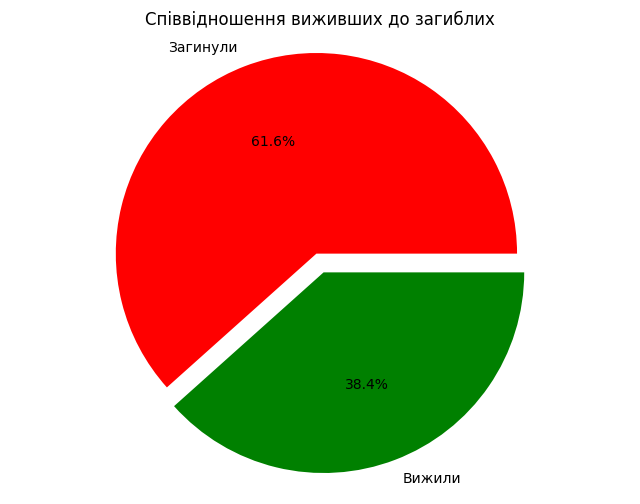

In [20]:
survived_count = titanic['Survived'].value_counts()

labels = ['Загинули', 'Вижили']
sizes = [survived_count[0], survived_count[1]]

colors = ['red', 'green']

explode = (0.1, 0)

plt.figure(figsize=(8, 6))
plt.pie(sizes, explode=explode, labels=labels, colors=colors,  autopct='%1.1f%%')
plt.axis('equal')
plt.title('Співвідношення виживших до загиблих')
plt.show()

Висновок: кількість виживших менша, ніж кількість загиблих.
Кількість виживших та загиблих отримуємо методом value_counts() для колонки "Survived".
Метод plt.pie() використовується для створення кругової діаграми. Дані подаються у вигляді списків sizes та labels.
Кольори змінено на червоний для загиблих та зелений.



3. (20б) Створіть bar chart, який би показував співвідношення загиблих до виживших для кожної статі. Для groupby використовуйте атрибут as_index=False.


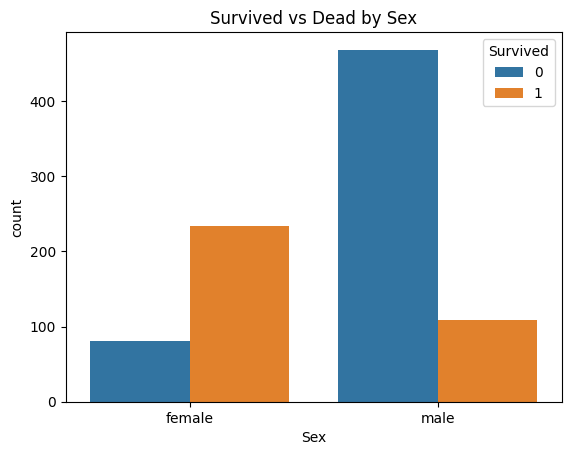

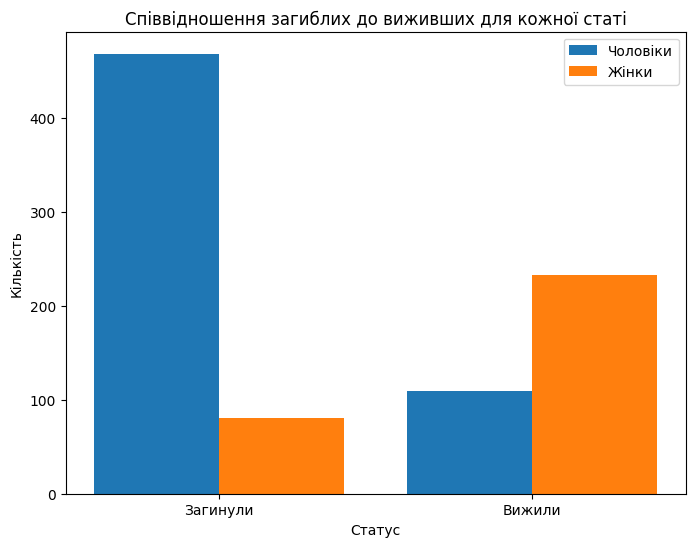

In [22]:
survival_by_sex = titanic.groupby(['Sex', 'Survived'], as_index=False).size()

male_data = survival_by_sex[survival_by_sex['Sex'] == 'male']
female_data = survival_by_sex[survival_by_sex['Sex'] == 'female']

fig, ax = plt.subplots(figsize=(8, 6))
bar_width = 0.4

ax.bar(male_data['Survived'], male_data['size'], bar_width, label='Чоловіки')
ax.bar(female_data['Survived'] + bar_width, female_data['size'], bar_width, label='Жінки')

ax.set_xlabel('Статус')
ax.set_ylabel('Кількість')
ax.set_title('Співвідношення загиблих до виживших для кожної статі')
ax.set_xticks([0.2, 1.2])
ax.set_xticklabels(['Загинули', 'Вижили'])
ax.legend()

plt.show()

Групуємо дані за статтю та виживанням та підраховуємо кількість загиблих та виживших.
Розділяємо дані на два окремі набори для чоловіків та жінок.
Створюємо bar chart, де для кожної статі відображаємо кількість загиблих та виживших.
Діаграма відображає кількість загиблих та виживших для кожної статі. Кількість виживших серед жінок більше, ніж серед чоловіків, що свідчить про те, що під час катастрофи було надано перевагу евакуації жінок.



4. (20б) Відобразіть кількість пропущених значень в датасеті по кожній із змінних.

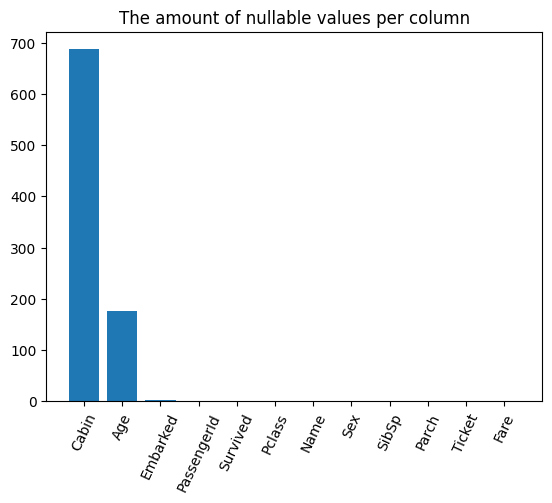

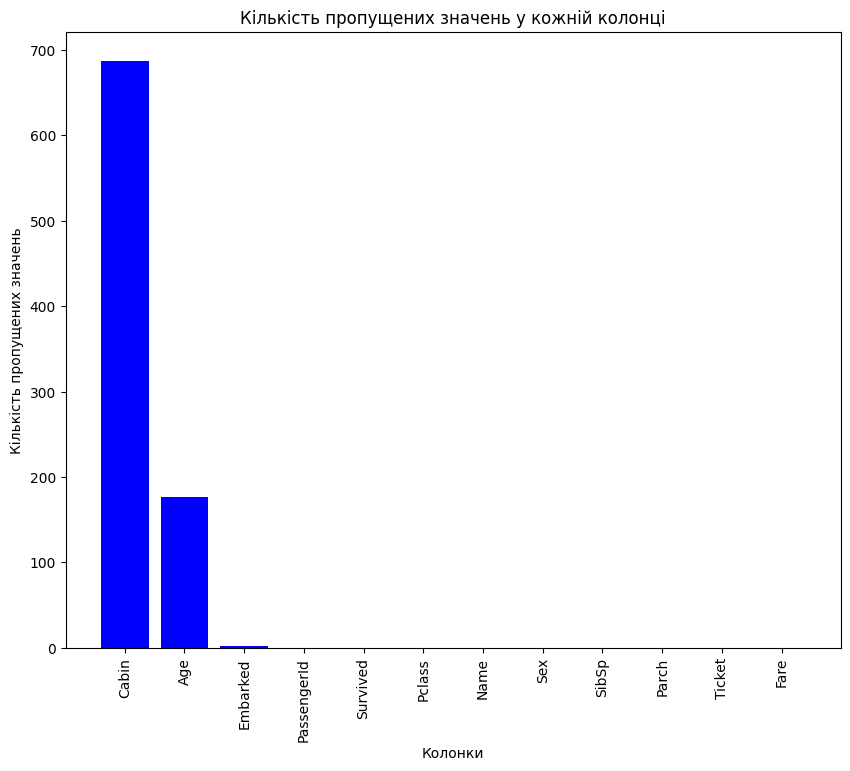

In [35]:
missing_values = titanic.isnull().sum()

missing_values_sorted = missing_values.sort_values(ascending=False)

plt.figure(figsize=(10, 8))
plt.bar(missing_values_sorted.index, missing_values_sorted.values, color='blue')
plt.xlabel('Колонки')
plt.ylabel('Кількість пропущених значень')
plt.title('Кількість пропущених значень у кожній колонці')
plt.xticks(rotation=90)  # Повертаємо підписи колонок на 90 градусів
plt.show()

Колонки відсортовані за зменшенням кількості пропущених значень, що дозволяє легко визначити, які змінні мають найбільшу кількість пропусків даних.

Великий бар на графіку вказує на велику кількість пропущених значень у відповідній змінній, тоді як короткі бари вказують на меншу кількість пропущених значень.



5. (10б) Побудуйте наступний графік, дайте йому назву та опишіть, що власне на них відображається.

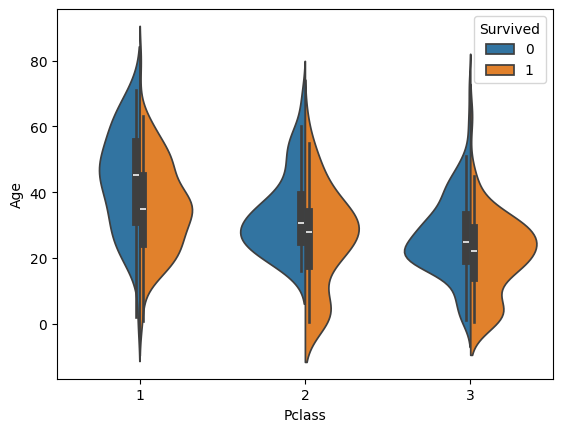

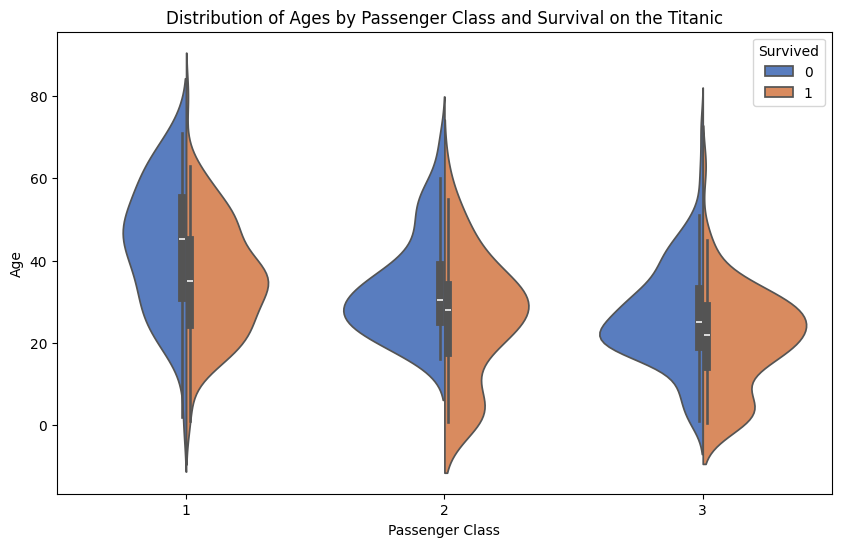

In [46]:
plt.figure(figsize=(10, 6))
sns.violinplot(x="Pclass", y="Age", hue="Survived", data=titanic, palette="muted", split=True)

plt.xlabel('Passenger Class')
plt.ylabel('Age')

plt.show()

Графік показує взаємозв'язок між класом пасажирів і віком, розділеними за статусом виживання на Титаніку. Ось розшифровка елементів на графіку:

Passanger class - це вісь x, яка представляє класи пасажирів на Титаніку,причому 1-й клас є найвищим.
Вісь y показує вік пасажирів.
Survived показано кольором віолончелей. В легенді вказано, що блакитний колір представляє пасажирів, які не вижили (0), а помаранчевий - тих, хто вижив (1).
Форма Віолончелей: Форма кожної віолончелі представляє оцінку щільності ядра розподілу віку для тієї категорії. Ширші секції віолончелі показують діапазони віку з вищою частотою пасажирів, тоді як вужчі секції показують діапазони віку з нижчою частотою пасажирів.

6. (13б) Побудуйте графік розподілу частот по віку пасажирів.


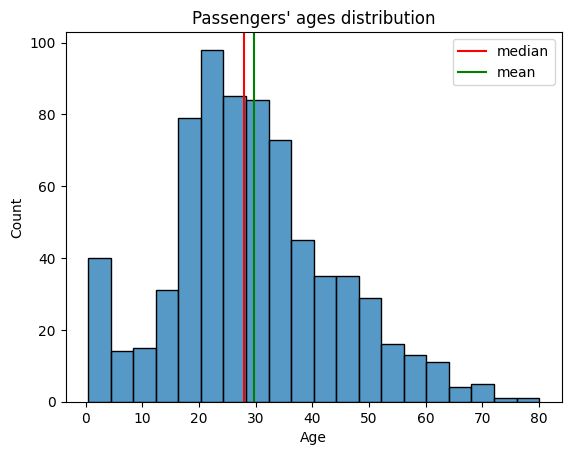

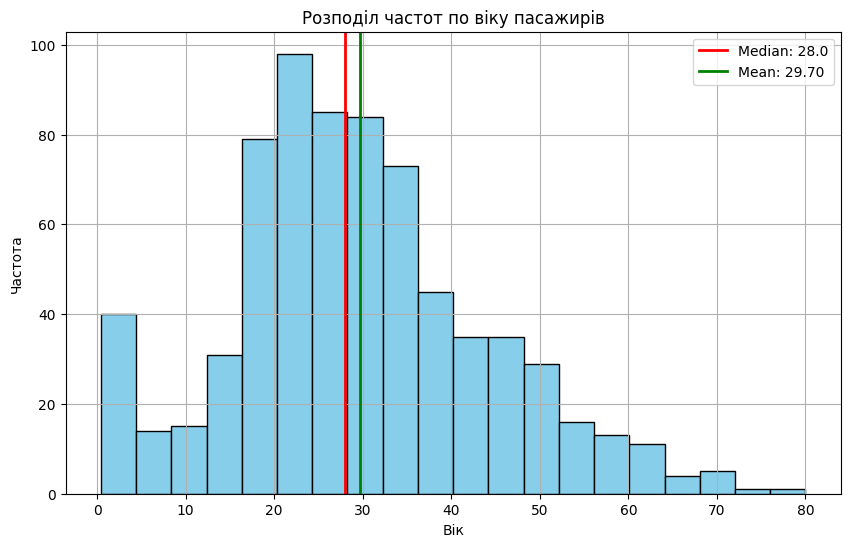

In [42]:
median_age = titanic['Age'].median()
mean_age = titanic['Age'].mean()

plt.figure(figsize=(10, 6))
plt.hist(titanic['Age'].dropna(), bins=20, color='skyblue', edgecolor='black')
plt.axvline(median_age, color='red', linewidth=2, label=f'Median: {median_age}')
plt.axvline(mean_age, color='green', linewidth=2, label=f'Mean: {mean_age:.2f}')
plt.xlabel('Вік')
plt.ylabel('Частота')
plt.title('Розподіл частот по віку пасажирів')
plt.legend()
plt.grid(True)
plt.show()

 Гістограма показує, скільки пасажирів потрапляє в кожний з вікових інтервалів.

Вертикальні лінії відповідають середньому значенню та медіані віку пасажирів: 28 і 29.7 відповідно.


7. (25б) Поставте бізнес-питання до даних. Дайте на нього відповідь за допомогою візуалізацій. Прокоментуйте отриману відповідь.

Як клас пасажирів вплинув на виживання?

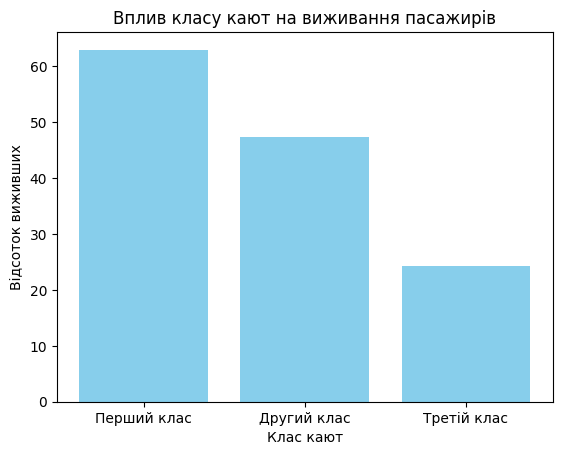

In [48]:
survival_rate_by_class = titanic.groupby('Pclass')['Survived'].mean() * 100

plt.bar(survival_rate_by_class.index, survival_rate_by_class.values, color='skyblue')

plt.xlabel('Клас кают')
plt.ylabel('Відсоток виживших')
plt.title('Вплив класу кают на виживання пасажирів')
plt.xticks([1, 2, 3], ['Перший клас', 'Другий клас', 'Третій клас'])

plt.show()

Стовпчикова діаграма показує відсоток виживших у кожному класі пасажирів.
За графіком видно, що виживших у першому класі було найбільше. Це свідчить про те, що пасажири першого класу мали більше шансів на виживання порівняно з пасажирами інших класів.


# Вітаю! Ви велика(ий) молодець, що впоралась(вся). Похваліть себе та побалуйте чимось приємним. Я Вами пишаюся.

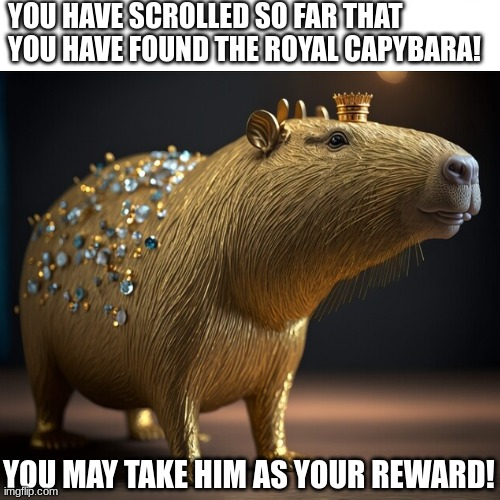